In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Fetch data from sqlite3 to pandas dataframe

In [3]:
import sqlite3

conn = sqlite3.connect('../db.sqlite3')

In [4]:

FETCH_BOOK_QUERY = "SELECT `id`, `title`, `publisher`, `author`, `image`, `category_id`, `available` FROM `libraryapp_book` "

book_list = pd.read_sql_query(FETCH_BOOK_QUERY, conn)
book_list.head()

,id,title,publisher,author,image,category_id,available
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0
1,6,DBA,ram,thapa,book/pos6.jpg,2,1
2,7,cryptography,ram,thapa,book/baag.jpg,1,1
3,8,The Hunger Games,Harper Collins Collins,Suzanne Collins,https://images.gr-assets.com/books/1447303603m...,3,7
4,9,Harry Potter and the Philosopher's Stone,Harper Collins Collins,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022m...,4,24


# Data Preparation

In [5]:
book_list.count()

id             205
title          205
publisher      205
author         205
image          205
category_id    205
available      205
dtype: int64

In [6]:
# rename book list dataframe columns
books = book_list.rename(
    {'id': 'book_id', 'title': 'book_title', 'image': 'book_image'}, axis=1)
books

,book_id,book_title,publisher,author,book_image,category_id,available
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0
1,6,DBA,ram,thapa,book/pos6.jpg,2,1
2,7,cryptography,ram,thapa,book/baag.jpg,1,1
3,8,The Hunger Games,Harper Collins Collins,Suzanne Collins,https://images.gr-assets.com/books/1447303603m...,3,7
4,9,Harry Potter and the Philosopher's Stone,Harper Collins Collins,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022m...,4,24
...,...,...,...,...,...,...,...
200,205,"The Devil in the White City: Murder, Magic, an...",New Directions,"Erik Larson, Tony Goldwyn",https://images.gr-assets.com/books/1312066724m...,3,47
201,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26
202,207,The Chronicles of Narnia,Penguin Books Ltd. (London),"C.S. Lewis, Pauline Baynes",https://images.gr-assets.com/books/1449868701m...,3,30
203,208,Twilight: The Complete Illustrated Movie Compa...,Business Plus,Mark Cotta Vaz,https://images.gr-assets.com/books/1352539022m...,4,49


In [7]:
books_category = pd.read_sql_query("SELECT `id` as `category_id`, `title` as `category_title`, `image` as `category_image` FROM `libraryapp_bookcategory`", conn)

books_category.head()

,category_id,category_title,category_image
0,1,interseting,bookcategory/download.jpeg
1,2,educational,bookcategory/e1.jpg
2,3,Fiction,https://www.google.com/url?sa=i&url=https%3A%2...
3,4,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...


In [8]:
# merge books and book_category
books_data = pd.merge(books, books_category, on='category_id')
books_data

,book_id,book_title,publisher,author,book_image,category_id,available,category_title,category_image
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg
1,6,DBA,ram,thapa,book/pos6.jpg,2,1,educational,bookcategory/e1.jpg
2,209,Networking,Pearson,Unknown,book/alone-tree-sunset-qe.jpg,2,3,educational,bookcategory/e1.jpg
3,7,cryptography,ram,thapa,book/baag.jpg,1,1,interseting,bookcategory/download.jpeg
4,8,The Hunger Games,Harper Collins Collins,Suzanne Collins,https://images.gr-assets.com/books/1447303603m...,3,7,Fiction,https://www.google.com/url?sa=i&url=https%3A%2...
...,...,...,...,...,...,...,...,...,...
200,197,One for the Money,Penguin Books,Janet Evanovich,https://images.gr-assets.com/books/1316730230m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...
201,202,Die Verwandlung,Penguin Books,"Franz Kafka, Stanley Corngold",https://images.gr-assets.com/books/1359061917m...,4,6,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...
202,203,The Titan's Curse,Henry Holt & Company,Rick Riordan,https://images.gr-assets.com/books/1361038385m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...
203,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...


In [9]:
book_ratings = pd.read_sql_query("SELECT `id`, `rating`, `book_id`, `user_id` from `libraryapp_bookrating` ", conn)
book_ratings.head()

,id,rating,book_id,user_id
0,1,3,5,5
1,2,4,5,6
2,3,4,6,6
3,4,4,5,6
4,5,3,5,5


In [10]:
books_with_rating = pd.merge(books_data, book_ratings, on='book_id')
books_with_rating

,book_id,book_title,publisher,author,book_image,category_id,available,category_title,category_image,id,rating,user_id
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,1,3,5
1,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,2,4,6
2,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,4,4,6
3,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,5,3,5
4,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,6,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
238,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,194,4,8
239,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,207,5,7
240,208,Twilight: The Complete Illustrated Movie Compa...,Business Plus,Mark Cotta Vaz,https://images.gr-assets.com/books/1352539022m...,4,49,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,56,4,6
241,208,Twilight: The Complete Illustrated Movie Compa...,Business Plus,Mark Cotta Vaz,https://images.gr-assets.com/books/1352539022m...,4,49,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,233,4,8


In [11]:
books_with_rating.groupby('book_title')['rating'].count()

book_title
 The Fellowship of the Ring                                   2
A Christmas Carol                                             2
A Clockwork Orange                                            1
A Feast for Crows                                             2
A Game of Thrones                                             2
                                                             ..
Where the Wild Things Are                                     3
Wicked: The Life and Times of the Wicked Witch of the West    1
Wuthering Heights                                             1
cryptography                                                  4
Анна Каренина                                                 2
Name: rating, Length: 131, dtype: int64

In [12]:
ratings = pd.DataFrame(books_with_rating.groupby('book_title')['rating'].mean())
ratings['total_rating'] = pd.DataFrame(books_with_rating.groupby('book_title')['rating'].count())
ratings

,rating,total_rating
book_title,,
The Fellowship of the Ring,4.500000,2
A Christmas Carol,3.000000,2
A Clockwork Orange,4.000000,1
A Feast for Crows,4.000000,2
A Game of Thrones,3.000000,2
...,...,...
Where the Wild Things Are,4.666667,3
Wicked: The Life and Times of the Wicked Witch of the West,5.000000,1
Wuthering Heights,5.000000,1


# Explantory Data Analysis

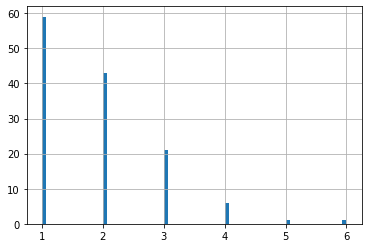

In [27]:
ratings['total_rating'].hist(bins=70);

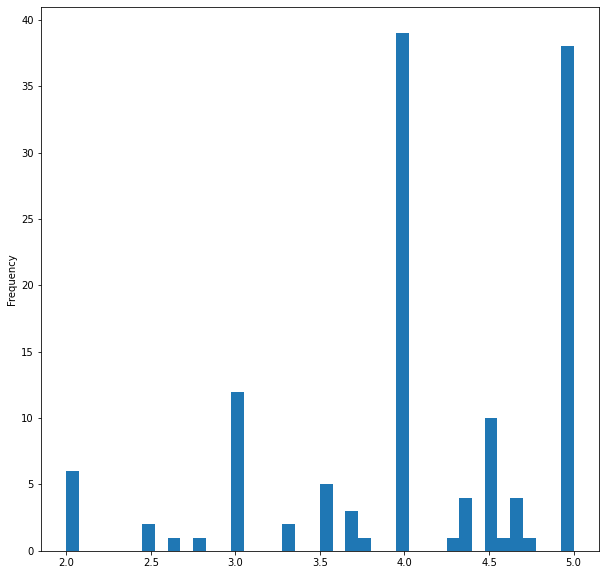

In [26]:
ratings['rating'].plot.hist(figsize=(10, 10), bins=40);

# Top Rated Books

In [40]:
min_rating = 3
top_rated_books = ratings[ratings['rating'] >= min_rating]
top_rated_books

,rating,total_rating
book_title,,
The Fellowship of the Ring,4.500000,2
A Christmas Carol,3.000000,2
A Clockwork Orange,4.000000,1
A Feast for Crows,4.000000,2
A Game of Thrones,3.000000,2
...,...,...
Water for Elephants,4.000000,1
Where the Wild Things Are,4.666667,3
Wicked: The Life and Times of the Wicked Witch of the West,5.000000,1


# Data Preparation

In [74]:
book_ratingCount = (books_with_rating.
     groupby(['book_title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['book_title', 'totalRatingCount']]
    )
book_ratingCount

,book_title,totalRatingCount
0,The Fellowship of the Ring,2
1,A Christmas Carol,2
2,A Clockwork Orange,1
3,A Feast for Crows,2
4,A Game of Thrones,2
...,...,...
126,Where the Wild Things Are,3
127,Wicked: The Life and Times of the Wicked Witch...,1
128,Wuthering Heights,1
129,cryptography,4


In [75]:
rating_with_totalRatingCount = books_with_rating.merge(book_ratingCount, left_on = 'book_title', right_on = 'book_title', how = 'left')
rating_with_totalRatingCount.head()

,book_id,book_title,publisher,author,book_image,category_id,available,category_title,category_image,id,rating,user_id,totalRatingCount
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,1,3,5,6
1,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,2,4,6,6
2,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,4,4,6,6
3,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,5,3,5,6
4,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,6,4,6,6


In [78]:
rating_with_totalRatingCount = rating_with_totalRatingCount[['user_id','book_title','rating', 'totalRatingCount' ]]
rating_with_totalRatingCount

,user_id,book_title,rating,totalRatingCount
0,5,DAA,3,6
1,6,DAA,4,6
2,6,DAA,4,6
3,5,DAA,3,6
4,6,DAA,4,6
...,...,...,...,...
238,8,Bared to You,4,3
239,7,Bared to You,5,3
240,6,Twilight: The Complete Illustrated Movie Compa...,4,3
241,8,Twilight: The Complete Illustrated Movie Compa...,4,3


In [79]:
rating_with_totalRatingCount.describe()

,user_id,rating,totalRatingCount
count,243.000000,243.000000,243.000000
mean,7.197531,4.090535,2.374486
std,1.590933,1.000017,1.158729
min,5.000000,1.000000,1.000000
25%,6.000000,4.000000,2.000000
50%,7.000000,4.000000,2.000000
75%,8.000000,5.000000,3.000000
max,14.000000,5.000000,6.000000


# Into Collabarative Filtering
---
### Merge book_list and book_rating

# KNN Algorithm

In [123]:
from scipy.sparse import csr_matrix
books_pivot = books_with_rating.pivot_table(index='book_title',columns='user_id', values='rating').fillna(0)
# csr_matrix: Create Compressed Sparse Row matrix
books_matrix = csr_matrix(books_pivot.values)

books_matrix.shape

(131, 10)

In [124]:
books_pivot

user_id,5,6,7,8,9,10,11,12,13,14
book_title,,,,,,,,,,
The Fellowship of the Ring,0.0,0.000000,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
A Christmas Carol,1.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Clockwork Orange,0.0,0.000000,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
A Feast for Crows,4.0,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Game of Thrones,0.0,0.000000,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Where the Wild Things Are,0.0,0.000000,4.5,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Wicked: The Life and Times of the Wicked Witch of the West,0.0,0.000000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.000000,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(books_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

## Test KNN Recommendation Engine

In [231]:
query_index = np.random.choice(books_pivot.shape[0])
distances, indices = model_knn.kneighbors(books_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(books_pivot.index[query_index]))
    else:
        print('{0}: {1} | Distance: {2}'.format(i, books_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Return of the King:

1: The Stand | Distance: 0.025267681471725534
2: Анна Каренина | Distance: 0.03272037560866836
3: Insurgent | Distance: 0.06665439379694038
4: Miss Peregrine’s Home for Peculiar Children | Distance: 0.08618845137974274
5: The Giving Tree | Distance: 0.08618845137974274


In [158]:
choice = np.random.choice(books_pivot.shape[0])

In [154]:
books_pivot.iloc[choice, :].values.reshape(1, -1)

array([[0., 0., 2., 0., 0., 0., 0., 0., 0., 0.]])

# Collab Filtering using Matrix Factorization

In [210]:
books_user_pivot = books_with_rating.pivot_table(index='user_id',columns='book_title', values='rating').fillna(0)

In [211]:
books_user_pivot_T = books_user_pivot.T
books_user_pivot_T.head()

user_id,5,6,7,8,9,10,11,12,13,14
book_title,,,,,,,,,,
The Fellowship of the Ring,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
A Christmas Carol,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Clockwork Orange,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
A Feast for Crows,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Game of Thrones,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
import sklearn
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6, random_state=17)
matrix = svd.fit_transform(books_user_pivot_T)
matrix.shape

(131, 6)

In [214]:
corr = np.corrcoef(matrix)
corr.shape

(131, 131)

In [221]:
book_title = books_user_pivot.columns
book_title_list = list(book_title)


In [232]:
book = books_pivot.index[query_index]

corr_book = corr[query_index]
list(book_title[(corr_book < 1.0) & (corr_book > 0.8)])


['A Clockwork Orange',
 'Dracula',
 'Gone with the Wind',
 'Great Expectations',
 'Insurgent',
 'Luftslottet som sprängdes',
 'Miss Peregrine’s Home for Peculiar Children',
 'Siddhartha',
 'The Giving Tree',
 "The Hitchhiker's Guide to the Galaxy",
 'The Lovely Bones',
 'The Maze Runner',
 'The Sea of Monsters',
 'The Stand',
 'Twilight: The Complete Illustrated Movie Companion',
 'Unbroken: A World War II Story of Survival, Resilience, and Redemption',
 'Water for Elephants',
 'Wuthering Heights',
 'Анна Каренина']